In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
forest = pd.read_csv("forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forest.shape

(517, 31)

In [4]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
forest1 = forest.drop(['month','day'],axis=1)
forest2 = forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],axis=1)

In [6]:
forest_new = forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],axis=1)

In [7]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [8]:
forest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [9]:
print(forest2['month'].value_counts())
print(forest2['day'].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


In [10]:
forest2['month']=LabelEncoder().fit_transform(forest2['month'])
forest2['day']=LabelEncoder().fit_transform(forest2['day'])

In [11]:
forest2.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


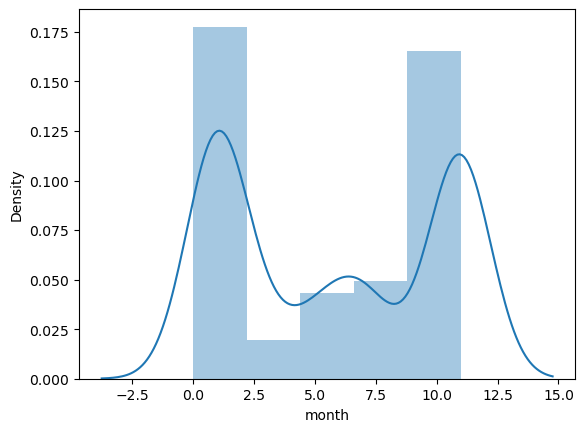

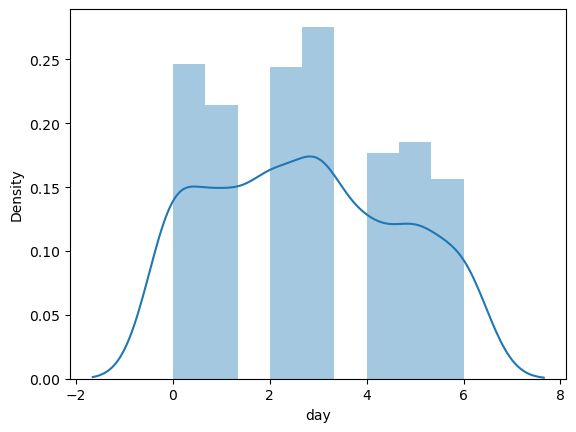

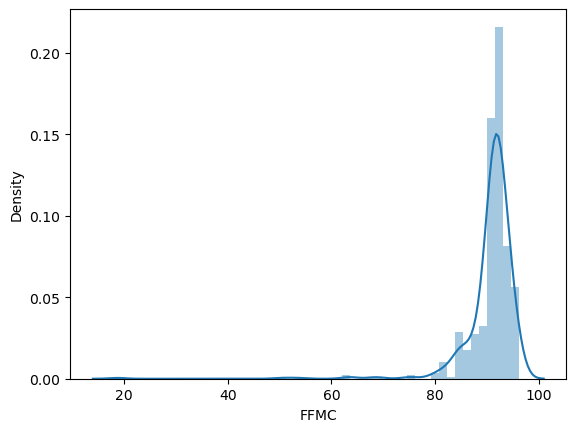

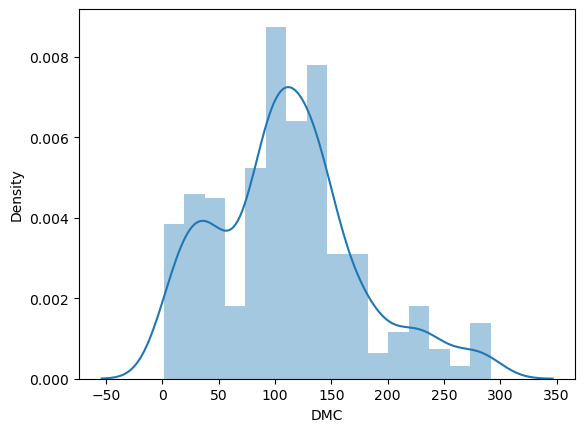

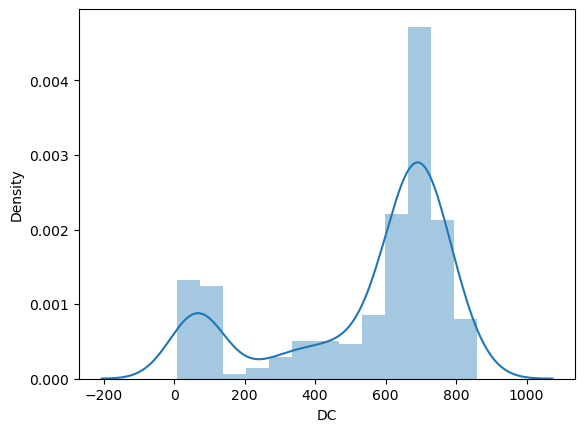

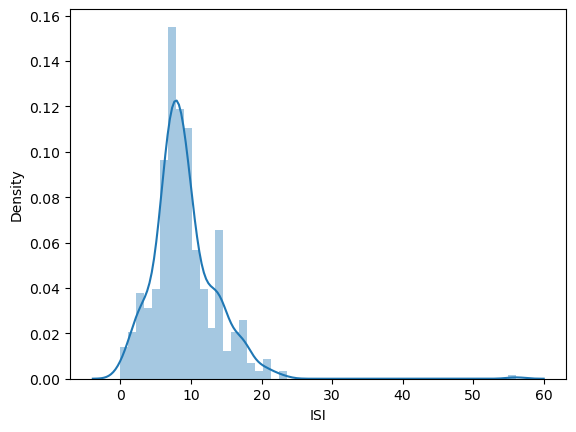

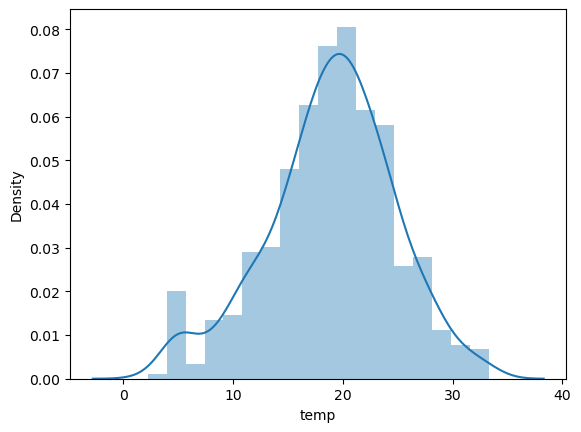

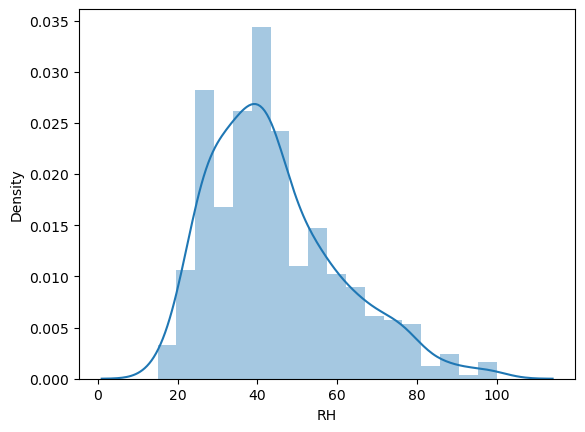

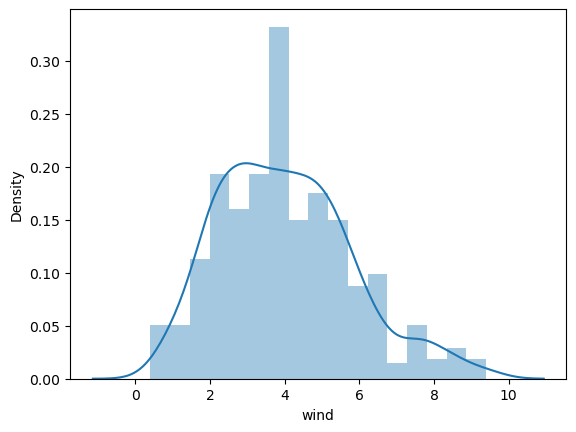

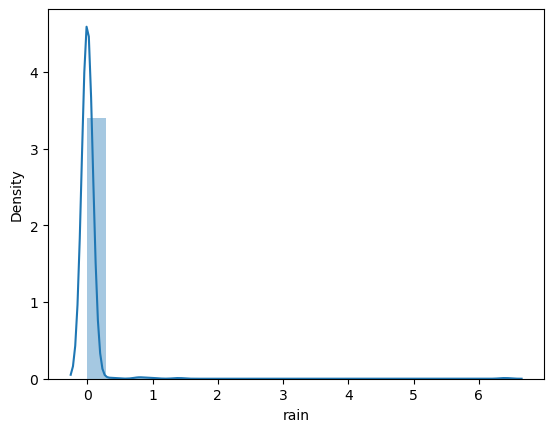

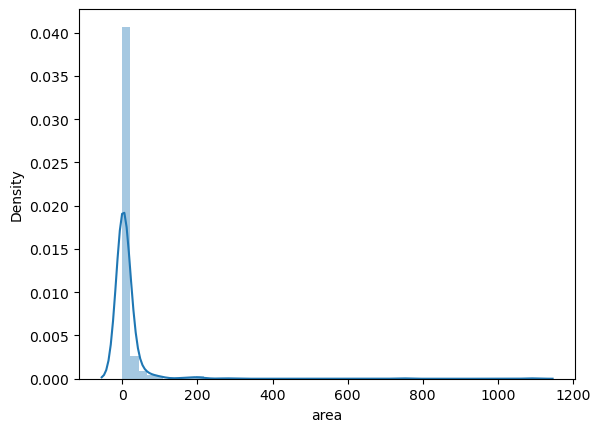

In [12]:
for data in forest2.columns:
    if forest2[data].dtype!='object':
        sns.distplot(forest2[data])
        plt.show()

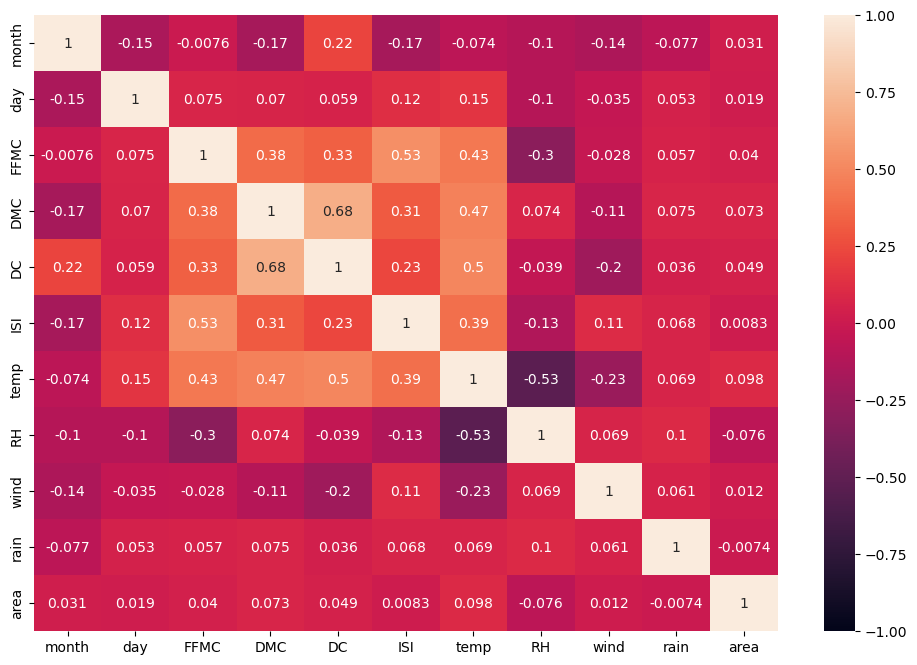

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(forest2.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [13]:
forest2['area'].describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [15]:
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

forest_new['damage_severity']=forest_new['area'].apply(area_cat)

In [16]:
forest_new.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_severity
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


In [17]:
cat_col=['month','day']

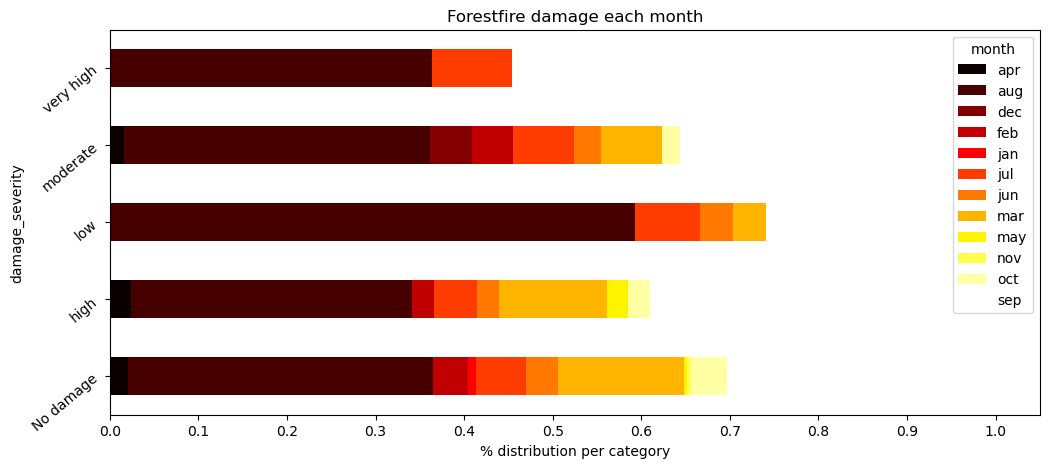

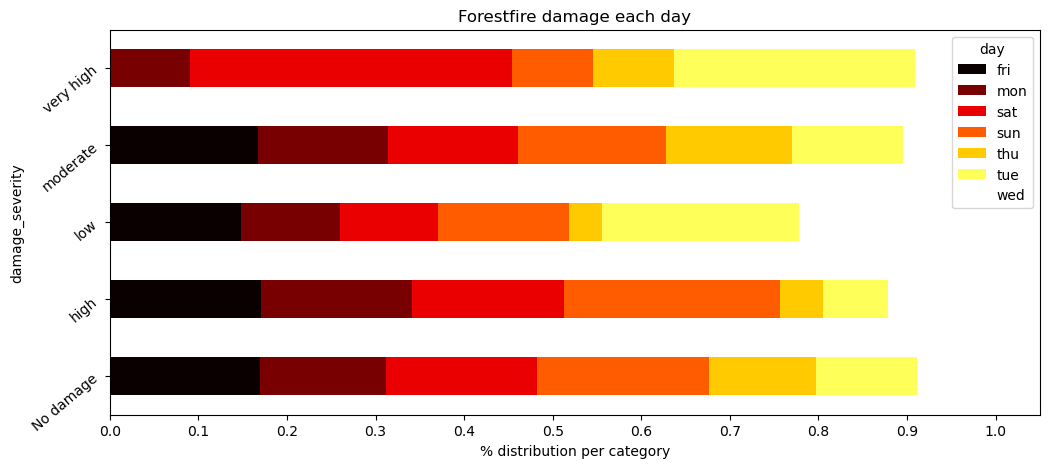

In [18]:
for cat in cat_col:
    cross=pd.crosstab(index=forest_new['damage_severity'],columns=forest_new[cat],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12,5))
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(cat))
plt.show()

In [19]:
forest2['size_category']=np.where((forest['size_category']=='small'),0,1)

y=forest2[['size_category']]
x=forest2.drop('size_category',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.33,random_state=42)

sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)

In [20]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [21]:
x.shape

(517, 11)

In [22]:
y

,size_category
0,0
1,0
2,0
3,0
4,0
...,...
512,1
513,1
514,1
515,0


In [23]:
model=Sequential()
model.add(Dense(12,input_dim=11,kernel_initializer='normal',activation='softplus'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [24]:
history=model.fit(x_train,y_train,validation_split=0.33,epochs=200,batch_size=20)

Epoch 1/200


12/12 [==============================] - 1s 20ms/step - loss: 0.2378 - accuracy: 0.7056 - val_loss: 0.2258 - val_accuracy: 0.7826
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2294 - accuracy: 0.7056 - val_loss: 0.2131 - val_accuracy: 0.7826
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2219 - accuracy: 0.7056 - val_loss: 0.2040 - val_accuracy: 0.7826
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2174 - accuracy: 0.7056 - val_loss: 0.1962 - val_accuracy: 0.7826
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2137 - accuracy: 0.7056 - val_loss: 0.1904 - val_accuracy: 0.7826
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2111 - accuracy: 0.7056 - val_loss: 0.1865 - val_accuracy: 0.7826
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2102 - accuracy: 0.7056 - val_loss: 0.1828 - val_accuracy: 0.7826
Epoch 8/20

12/12 [==============================] - 0s 8ms/step - loss: 0.2065 - accuracy: 0.7056 - val_loss: 0.1757 - val_accuracy: 0.7826
Epoch 56/200
12/12 [==============================] - 0s 9ms/step - loss: 0.2065 - accuracy: 0.7056 - val_loss: 0.1755 - val_accuracy: 0.7826
Epoch 57/200
12/12 [==============================] - 0s 9ms/step - loss: 0.2065 - accuracy: 0.7056 - val_loss: 0.1755 - val_accuracy: 0.7826
Epoch 58/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2064 - accuracy: 0.7056 - val_loss: 0.1752 - val_accuracy: 0.7826
Epoch 59/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2064 - accuracy: 0.7056 - val_loss: 0.1747 - val_accuracy: 0.7826
Epoch 60/200
12/12 [==============================] - 0s 4ms/step - loss: 0.2063 - accuracy: 0.7056 - val_loss: 0.1749 - val_accuracy: 0.7826
Epoch 61/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2063 - accuracy: 0.7056 - val_loss: 0.1746 - val_accuracy: 0.7826
Epoch 62/200
12/12 

Epoch 113/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.7056 - val_loss: 0.1745 - val_accuracy: 0.7826
Epoch 114/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2023 - accuracy: 0.7056 - val_loss: 0.1750 - val_accuracy: 0.7826
Epoch 115/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2020 - accuracy: 0.7056 - val_loss: 0.1745 - val_accuracy: 0.7826
Epoch 116/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2019 - accuracy: 0.7056 - val_loss: 0.1746 - val_accuracy: 0.7826
Epoch 117/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2019 - accuracy: 0.7056 - val_loss: 0.1745 - val_accuracy: 0.7913
Epoch 118/200
12/12 [==============================] - 0s 4ms/step - loss: 0.2018 - accuracy: 0.7056 - val_loss: 0.1744 - val_accuracy: 0.7913
Epoch 119/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2016 - accuracy: 0.7056 - val_loss: 0.1748 - val_accuracy: 0.7913

12/12 [==============================] - 0s 6ms/step - loss: 0.1952 - accuracy: 0.7056 - val_loss: 0.1742 - val_accuracy: 0.7913
Epoch 171/200
12/12 [==============================] - 0s 6ms/step - loss: 0.1949 - accuracy: 0.7056 - val_loss: 0.1751 - val_accuracy: 0.7913
Epoch 172/200
12/12 [==============================] - 0s 5ms/step - loss: 0.1948 - accuracy: 0.7056 - val_loss: 0.1751 - val_accuracy: 0.7913
Epoch 173/200
12/12 [==============================] - 0s 8ms/step - loss: 0.1948 - accuracy: 0.7056 - val_loss: 0.1765 - val_accuracy: 0.7913
Epoch 174/200
12/12 [==============================] - 0s 6ms/step - loss: 0.1947 - accuracy: 0.7056 - val_loss: 0.1756 - val_accuracy: 0.7913
Epoch 175/200
12/12 [==============================] - 0s 6ms/step - loss: 0.1945 - accuracy: 0.7056 - val_loss: 0.1762 - val_accuracy: 0.7913
Epoch 176/200
12/12 [==============================] - 0s 5ms/step - loss: 0.1946 - accuracy: 0.7056 - val_loss: 0.1745 - val_accuracy: 0.7913
Epoch 177/200

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
score=model.evaluate(x_train,y_train)

11/11 [==============================] - 0s 1ms/step - loss: 0.1850 - accuracy: 0.7370


In [27]:
score=model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.8713


In [28]:
y_pred=np.where(model.predict(x_test)>0.9,1,0)

6/6 [==============================] - 0s 1ms/step


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       125
           1       0.00      0.00      0.00        46

    accuracy                           0.73       171
   macro avg       0.37      0.50      0.42       171
weighted avg       0.53      0.73      0.62       171



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[125,   0],
       [ 46,   0]], dtype=int64)

In [31]:
score

[0.11330824345350266, 0.871345043182373]

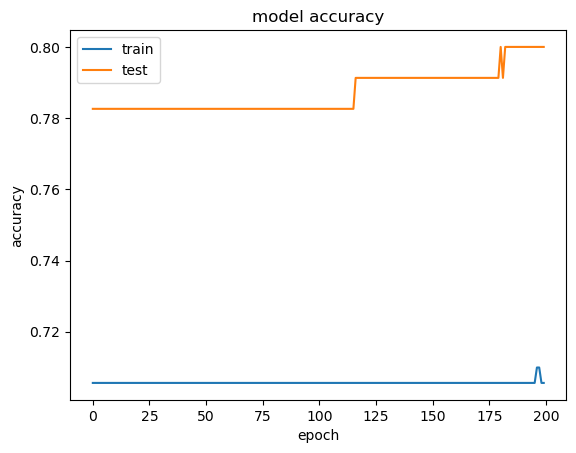

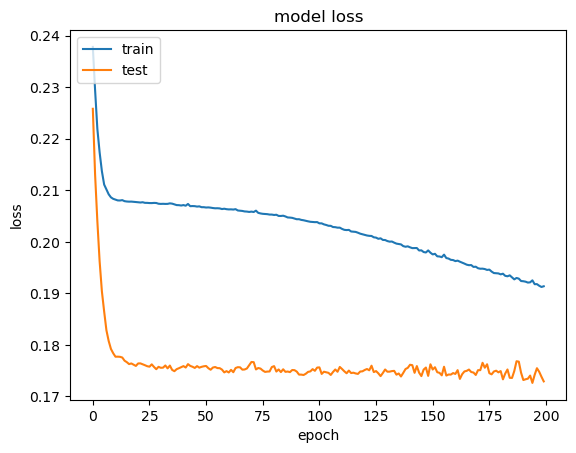

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [34]:
y=forest2[['size_category']]
x=forest2.drop('size_category',axis=1)
x.shape

(517, 11)

In [35]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.33,random_state=42)
sc=StandardScaler()
xtran=sc.fit_transform(x)
ytran=sc.fit_transform(y)
xtran

array([[ 0.28422225, -1.42312073, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 0.97087134,  1.17671466, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 0.97087134, -0.38318657, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [-1.08907592,  0.13678051, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [-1.08907592, -0.38318657,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 0.74198831,  1.17671466, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [36]:
def create_model(learning_rate=0.001):
    model_new = Sequential()
    model_new.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model_new.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model_new.add(Dense(units=1, kernel_initializer='normal', activation='linear'))  # 'linear' for regression

    adam = Adam(learning_rate=learning_rate)
    model_new.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])  # 'mae' for Mean Absolute Error
    return model_new

In [37]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold,GridSearchCV
from scikeras.wrappers import KerasRegressor
from keras.layers import Dense
from keras.optimizers import Adam

batch_size = [10, 20, 40]
epochs = [10, 50, 100, 150]
learning_rates = [0.001, 0.01, 0.1]

# Create a dictionary for GridSearchCV parameter grid
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Create the KerasRegressor for regression
model_test = KerasRegressor(build_fn=create_model, verbose=0)

# Use GridSearchCV to search over batch_size, epochs, and learning_rate
grid = GridSearchCV(estimator=model_test, param_grid=param_grid, cv=KFold(), verbose=10, error_score='raise')
grid_result = grid.fit(xtran, ytran)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END batch_size=10, epochs=10;, score=-13110246451600260799686305120256.000 total time=   1.2s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.142 total time=   1.2s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ...batch_size=10, epochs=10;, score=-0.020 total time=   1.2s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.270 total time=   1.1s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.092 total time=   1.2s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END b

[CV 5/5; 9/12] END ....batch_size=40, epochs=10;, score=0.001 total time=   0.8s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................
[CV 1/5; 10/12] END batch_size=40, epochs=50;, score=-29666148236346567967474395906048.000 total time=   1.3s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................
[CV 2/5; 10/12] END ...batch_size=40, epochs=50;, score=0.280 total time=   1.3s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................
[CV 3/5; 10/12] END ...batch_size=40, epochs=50;, score=0.226 total time=   1.3s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................
[CV 4/5; 10/12] END ...batch_size=40, epochs=50;, score=0.525 total time=   1.3s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................
[CV 5/5; 10/12] END ...batch_size=40, epochs=50;, score=0.324 total time=   1.3s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................

In [38]:
print("best: {}, using : {}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
std=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,std,params in zip(means,std,params):
  print(" {}, {}, params: {} ".format(mean,std,params))

best: -1.7267597178105042e+28, using : {'batch_size': 10, 'epochs': 100}
 -2.6220492903200524e+30, 5.244098580640106e+30, params: {'batch_size': 10, 'epochs': 10} 
 -8.546967226025615e+29, 1.709393445205123e+30, params: {'batch_size': 10, 'epochs': 50} 
 -1.7267597178105042e+28, 3.4535194356210088e+28, params: {'batch_size': 10, 'epochs': 100} 
 -6.0265397735687995e+29, 1.2053079547137599e+30, params: {'batch_size': 10, 'epochs': 150} 
 -8.930662104770342e+30, 1.7861324209540685e+31, params: {'batch_size': 20, 'epochs': 10} 
 -1.1275749180972405e+30, 2.255149836194481e+30, params: {'batch_size': 20, 'epochs': 50} 
 -1.0051274626680033e+30, 2.0102549253360065e+30, params: {'batch_size': 20, 'epochs': 100} 
 -8.789743035485533e+29, 1.7579486070971063e+30, params: {'batch_size': 20, 'epochs': 150} 
 -7.92983452788373e+30, 1.585966905576746e+31, params: {'batch_size': 40, 'epochs': 10} 
 -5.933229647269313e+30, 1.1866459294538624e+31, params: {'batch_size': 40, 'epochs': 50} 
 -8.204120566

In [39]:
#!pip install tensorflow-decision-forests

In [40]:
#pip install tensorflow

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
#from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
#from tfdf.keras.wrappers import *
#from tensorflow.keras.wrappers.scikit_learn import *
from scikeras.wrappers import KerasClassifier

In [42]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.001, dropout_rate=0.0, batch_size=20, epochs=200):
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(8, input_dim=11, kernel_initializer='normal', activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(3, kernel_initializer='normal', activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

        adam = Adam(lr=self.learning_rate)
        model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        return (self.predict(X) == y).mean()

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]
batch_size = [10, 20, 40]
epochs = [10, 50, 100, 150]

param_grid = dict(learning_rate=learning_rate, dropout_rate=dropout_rate, batch_size=batch_size, epochs=epochs)

model_new = MyKerasClassifier()
grid = GridSearchCV(estimator=model_new, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(xtran, ytran)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 1/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 2/5; 1/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 1/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 3/5; 1/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 1/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 4/5; 1/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 1/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 5/5; 1/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 1/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 1/5; 2/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 2/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 2/5; 2/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 2/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.5s
[CV 3/5; 2/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 2/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.8s
[CV 4/5; 2/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 2/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.3s
[CV 5/5; 2/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 2/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 1/5; 3/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 3/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 2/5; 3/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 3/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 3/5; 3/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 3/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 4/5; 3/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 4/5; 3/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.2s
[CV 5/5; 3/108] START batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 3/108] END batch_size=10, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.2s
[CV 1/5; 4/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 4/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   4.0s
[CV 2/5; 4/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 4/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   3.2s
[CV 3/5; 4/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 4/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   3.1s
[CV 4/5; 4/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 4/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.7s
[CV 5/5; 4/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 4/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.7s
[CV 1/5; 5/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 5/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.7s
[CV 2/5; 5/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 5/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.7s
[CV 3/5; 5/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 5/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.7s
[CV 4/5; 5/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 4/5; 5/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.7s
[CV 5/5; 5/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 5/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 1/5; 6/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 1/5; 6/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.7s
[CV 2/5; 6/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 6/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.7s
[CV 3/5; 6/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 6/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   3.1s
[CV 4/5; 6/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 6/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   3.1s
[CV 5/5; 6/108] START batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 6/108] END batch_size=10, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.6s
[CV 1/5; 7/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 7/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.6s
[CV 2/5; 7/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 7/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.6s
[CV 3/5; 7/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 3/5; 7/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.6s
[CV 4/5; 7/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 7/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.8s
[CV 5/5; 7/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 7/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   5.7s
[CV 1/5; 8/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 8/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 2/5; 8/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 8/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 3/5; 8/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 8/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 4/5; 8/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 8/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 5/5; 8/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 8/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 1/5; 9/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 1/5; 9/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.6s
[CV 2/5; 9/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 2/5; 9/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.5s
[CV 3/5; 9/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 9/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.6s
[CV 4/5; 9/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 9/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   5.1s
[CV 5/5; 9/108] START batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 9/108] END batch_size=10, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.6s
[CV 1/5; 10/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 10/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.6s
[CV 2/5; 10/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 10/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.6s
[CV 3/5; 10/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 3/5; 10/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.7s
[CV 4/5; 10/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 4/5; 10/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.6s
[CV 5/5; 10/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 5/5; 10/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.5s
[CV 1/5; 11/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 11/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   6.6s
[CV 2/5; 11/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 11/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   6.5s
[CV 3/5; 11/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 11/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   6.5s
[CV 4/5; 11/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 11/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   6.4s
[CV 5/5; 11/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 11/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   6.5s
[CV 1/5; 12/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 1/5; 12/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   6.6s
[CV 2/5; 12/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 12/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   6.5s
[CV 3/5; 12/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 999us/step


[CV 3/5; 12/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   6.5s
[CV 4/5; 12/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 12/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   6.4s
[CV 5/5; 12/108] START batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 5/5; 12/108] END batch_size=10, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   7.0s
[CV 1/5; 13/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 13/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 2/5; 13/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 13/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.3s
[CV 3/5; 13/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 13/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.3s
[CV 4/5; 13/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 4/5; 13/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 5/5; 13/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 13/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 1/5; 14/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 14/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 2/5; 14/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 14/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 3/5; 14/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 14/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 4/5; 14/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 14/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 5/5; 14/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 5/5; 14/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 1/5; 15/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 1/5; 15/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 2/5; 15/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 15/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 3/5; 15/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 3/5; 15/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 4/5; 15/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 4/5; 15/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 5/5; 15/108] START batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 15/108] END batch_size=10, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 1/5; 16/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 16/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   3.1s
[CV 2/5; 16/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 16/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.6s
[CV 3/5; 16/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 16/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.6s
[CV 4/5; 16/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 16/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.6s
[CV 5/5; 16/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 16/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.6s
[CV 1/5; 17/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 17/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 2/5; 17/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 17/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 3/5; 17/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 17/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 4/5; 17/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 17/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 5/5; 17/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 17/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 1/5; 18/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 18/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.6s
[CV 2/5; 18/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 18/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.6s
[CV 3/5; 18/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 18/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.7s
[CV 4/5; 18/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 18/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.6s
[CV 5/5; 18/108] START batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 18/108] END batch_size=10, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.6s
[CV 1/5; 19/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 19/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.6s
[CV 2/5; 19/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 19/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.6s
[CV 3/5; 19/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 3/5; 19/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.6s
[CV 4/5; 19/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 19/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.6s
[CV 5/5; 19/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 19/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.6s
[CV 1/5; 20/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 20/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.7s
[CV 2/5; 20/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 2/5; 20/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 3/5; 20/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 20/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 4/5; 20/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 20/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 5/5; 20/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 5/5; 20/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 1/5; 21/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 1/5; 21/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.1s
[CV 2/5; 21/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 21/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   3.8s
[CV 3/5; 21/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 21/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.0s
[CV 4/5; 21/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 666us/step


[CV 4/5; 21/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   3.9s
[CV 5/5; 21/108] START batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 21/108] END batch_size=10, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   3.9s
[CV 1/5; 22/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 22/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.3s
[CV 2/5; 22/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 22/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 3/5; 22/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 22/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   5.8s
[CV 4/5; 22/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 4/5; 22/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.0s
[CV 5/5; 22/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 22/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.0s
[CV 1/5; 23/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 23/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   5.5s
[CV 2/5; 23/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 2/5; 23/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   5.7s
[CV 3/5; 23/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 23/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   7.2s
[CV 4/5; 23/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 23/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   7.4s
[CV 5/5; 23/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 23/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   6.3s
[CV 1/5; 24/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 24/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   7.2s
[CV 2/5; 24/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 2/5; 24/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   6.6s
[CV 3/5; 24/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 24/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   7.2s
[CV 4/5; 24/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 4/5; 24/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   6.5s
[CV 5/5; 24/108] START batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 5/5; 24/108] END batch_size=10, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   5.7s
[CV 1/5; 25/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 25/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.9s
[CV 2/5; 25/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 25/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.9s
[CV 3/5; 25/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 25/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.9s
[CV 4/5; 25/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 25/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.9s
[CV 5/5; 25/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 25/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.9s
[CV 1/5; 26/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 26/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 2/5; 26/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 26/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 3/5; 26/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 3/5; 26/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 4/5; 26/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 26/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 5/5; 26/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 5/5; 26/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 1/5; 27/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 27/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.0s
[CV 2/5; 27/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 27/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.2s
[CV 3/5; 27/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 27/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.0s
[CV 4/5; 27/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 27/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.9s
[CV 5/5; 27/108] START batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 27/108] END batch_size=10, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.9s
[CV 1/5; 28/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 28/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.3s
[CV 2/5; 28/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 843us/step


[CV 2/5; 28/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 3/5; 28/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 28/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.3s
[CV 4/5; 28/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 28/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.3s
[CV 5/5; 28/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 28/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.3s
[CV 1/5; 29/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 29/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 2/5; 29/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 2/5; 29/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.2s
[CV 3/5; 29/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 3/5; 29/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 4/5; 29/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 29/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 5/5; 29/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 29/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.2s
[CV 1/5; 30/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 30/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.2s
[CV 2/5; 30/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 2/5; 30/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.3s
[CV 3/5; 30/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 30/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.2s
[CV 4/5; 30/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 30/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.5s
[CV 5/5; 30/108] START batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 5/5; 30/108] END batch_size=10, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.3s
[CV 1/5; 31/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 1/5; 31/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   4.3s
[CV 2/5; 31/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 31/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   3.9s
[CV 3/5; 31/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 31/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   3.9s
[CV 4/5; 31/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 31/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   3.9s
[CV 5/5; 31/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 31/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   3.9s
[CV 1/5; 32/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 32/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   3.9s
[CV 2/5; 32/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 32/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   3.8s
[CV 3/5; 32/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 32/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 4/5; 32/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 32/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   4.0s
[CV 5/5; 32/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 5/5; 32/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   3.9s
[CV 1/5; 33/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 1/5; 33/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   3.9s
[CV 2/5; 33/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 33/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   3.9s
[CV 3/5; 33/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 33/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.0s
[CV 4/5; 33/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 33/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.0s
[CV 5/5; 33/108] START batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 33/108] END batch_size=10, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   4.0s
[CV 1/5; 34/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 34/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   5.6s
[CV 2/5; 34/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 34/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   5.3s
[CV 3/5; 34/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 34/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 4/5; 34/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 4/5; 34/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   6.1s
[CV 5/5; 34/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 34/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   5.5s
[CV 1/5; 35/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 1/5; 35/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   5.5s
[CV 2/5; 35/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 35/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   7.8s
[CV 3/5; 35/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 35/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   5.9s
[CV 4/5; 35/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 35/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   5.6s
[CV 5/5; 35/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 35/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   8.3s
[CV 1/5; 36/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 1/5; 36/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   6.3s
[CV 2/5; 36/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 36/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   5.7s
[CV 3/5; 36/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 36/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   5.8s
[CV 4/5; 36/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 36/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   5.8s
[CV 5/5; 36/108] START batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 36/108] END batch_size=10, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   5.7s
[CV 1/5; 37/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 37/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 2/5; 37/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 37/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 3/5; 37/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 37/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 4/5; 37/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 37/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 5/5; 37/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 37/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 1/5; 38/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 38/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 2/5; 38/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 38/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 3/5; 38/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 38/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 4/5; 38/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 38/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 5/5; 38/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 38/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 1/5; 39/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 39/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.9s
[CV 2/5; 39/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 39/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.9s
[CV 3/5; 39/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 3/5; 39/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 4/5; 39/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 4/5; 39/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 5/5; 39/108] START batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 39/108] END batch_size=20, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 1/5; 40/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 40/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.5s
[CV 2/5; 40/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 2/5; 40/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 3/5; 40/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 40/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.5s
[CV 4/5; 40/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 40/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.5s
[CV 5/5; 40/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 40/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.5s
[CV 1/5; 41/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 41/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.5s
[CV 2/5; 41/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 2/5; 41/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.5s
[CV 3/5; 41/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 41/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.4s
[CV 4/5; 41/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 836us/step


[CV 4/5; 41/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.5s
[CV 5/5; 41/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 41/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.6s
[CV 1/5; 42/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 42/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 2/5; 42/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 2/5; 42/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 3/5; 42/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 1s 998us/step


[CV 3/5; 42/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   2.5s
[CV 4/5; 42/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 4/5; 42/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 5/5; 42/108] START batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 42/108] END batch_size=20, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 1/5; 43/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 43/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.8s
[CV 2/5; 43/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 43/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.6s
[CV 3/5; 43/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 43/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 4/5; 43/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 4/5; 43/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.6s
[CV 5/5; 43/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 43/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.6s
[CV 1/5; 44/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 44/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 2/5; 44/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 2/5; 44/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 3/5; 44/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 3/5; 44/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.4s
[CV 4/5; 44/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 44/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 5/5; 44/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 44/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 1/5; 45/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 1/5; 45/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.3s
[CV 2/5; 45/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 999us/step


[CV 2/5; 45/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.3s
[CV 3/5; 45/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 45/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.4s
[CV 4/5; 45/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 45/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.5s
[CV 5/5; 45/108] START batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 45/108] END batch_size=20, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.6s
[CV 1/5; 46/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 46/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.1s
[CV 2/5; 46/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 46/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.4s
[CV 3/5; 46/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 46/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.2s
[CV 4/5; 46/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 46/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.1s
[CV 5/5; 46/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 46/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.2s
[CV 1/5; 47/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 47/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   3.9s
[CV 2/5; 47/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 47/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   4.0s
[CV 3/5; 47/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 47/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   4.0s
[CV 4/5; 47/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 3ms/step


[CV 4/5; 47/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   3.7s
[CV 5/5; 47/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 47/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   3.6s
[CV 1/5; 48/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 1/5; 48/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.2s
[CV 2/5; 48/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 48/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.2s
[CV 3/5; 48/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 48/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.2s
[CV 4/5; 48/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 4/5; 48/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.3s
[CV 5/5; 48/108] START batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 48/108] END batch_size=20, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.3s
[CV 1/5; 49/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 49/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 2/5; 49/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 2/5; 49/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 3/5; 49/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 49/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 4/5; 49/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 49/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 5/5; 49/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 49/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 1/5; 50/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 50/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 2/5; 50/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 50/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 3/5; 50/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 50/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 4/5; 50/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 50/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 5/5; 50/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 50/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 1/5; 51/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 1/5; 51/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.9s
[CV 2/5; 51/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 51/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 3/5; 51/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 51/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.0s
[CV 4/5; 51/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 51/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 5/5; 51/108] START batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 51/108] END batch_size=20, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 1/5; 52/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 996us/step


[CV 1/5; 52/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   2.1s
[CV 2/5; 52/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 52/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.5s
[CV 3/5; 52/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 52/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 4/5; 52/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 52/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.5s
[CV 5/5; 52/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 52/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 1/5; 53/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 53/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.7s
[CV 2/5; 53/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 53/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.1s
[CV 3/5; 53/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 53/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.6s
[CV 4/5; 53/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 53/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   2.0s
[CV 5/5; 53/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 53/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.7s
[CV 1/5; 54/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 54/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.7s
[CV 2/5; 54/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 54/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.7s
[CV 3/5; 54/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 54/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 4/5; 54/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 54/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   3.3s
[CV 5/5; 54/108] START batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 54/108] END batch_size=20, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.6s
[CV 1/5; 55/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 1/5; 55/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.5s
[CV 2/5; 55/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 2/5; 55/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 3/5; 55/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 55/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 4/5; 55/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 55/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 5/5; 55/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 55/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 1/5; 56/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 56/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.5s
[CV 2/5; 56/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 56/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 3/5; 56/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 56/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.4s
[CV 4/5; 56/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 56/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.4s
[CV 5/5; 56/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 5/5; 56/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.4s
[CV 1/5; 57/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 57/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.4s
[CV 2/5; 57/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 57/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.5s
[CV 3/5; 57/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 57/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.8s
[CV 4/5; 57/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 57/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.4s
[CV 5/5; 57/108] START batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 5/5; 57/108] END batch_size=20, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.3s
[CV 1/5; 58/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 58/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.2s
[CV 2/5; 58/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 58/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   4.0s
[CV 3/5; 58/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 58/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   4.0s
[CV 4/5; 58/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 58/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   4.9s
[CV 5/5; 58/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 58/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.9s
[CV 1/5; 59/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 59/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   3.8s
[CV 2/5; 59/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 59/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   4.6s
[CV 3/5; 59/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 59/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   5.0s
[CV 4/5; 59/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 59/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   4.4s
[CV 5/5; 59/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 3ms/step


[CV 5/5; 59/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   3.7s
[CV 1/5; 60/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 1/5; 60/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   4.0s
[CV 2/5; 60/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 60/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.8s
[CV 3/5; 60/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 60/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.7s
[CV 4/5; 60/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 60/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.3s
[CV 5/5; 60/108] START batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 60/108] END batch_size=20, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.4s
[CV 1/5; 61/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 61/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 2/5; 61/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 61/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 3/5; 61/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 61/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 4/5; 61/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 4/5; 61/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 5/5; 61/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 61/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 1/5; 62/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 62/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 2/5; 62/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 62/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 3/5; 62/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 3ms/step


[CV 3/5; 62/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   1.0s
[CV 4/5; 62/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 4/5; 62/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 5/5; 62/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 62/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 1/5; 63/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 63/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.0s
[CV 2/5; 63/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 63/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 3/5; 63/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 63/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.0s
[CV 4/5; 63/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 4/5; 63/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   1.0s
[CV 5/5; 63/108] START batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 5/5; 63/108] END batch_size=20, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.9s
[CV 1/5; 64/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 1/5; 64/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 2/5; 64/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 64/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.8s
[CV 3/5; 64/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 64/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.5s
[CV 4/5; 64/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 64/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.5s
[CV 5/5; 64/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 64/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 1/5; 65/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 65/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.6s
[CV 2/5; 65/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 65/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.6s
[CV 3/5; 65/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 3/5; 65/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.5s
[CV 4/5; 65/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 4/5; 65/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.5s
[CV 5/5; 65/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 5/5; 65/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.5s
[CV 1/5; 66/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 66/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 2/5; 66/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 66/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.4s
[CV 3/5; 66/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 3/5; 66/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 4/5; 66/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 66/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 5/5; 66/108] START batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 66/108] END batch_size=20, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 1/5; 67/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 67/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 2/5; 67/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1000us/step


[CV 2/5; 67/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.5s
[CV 3/5; 67/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 67/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 4/5; 67/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 999us/step


[CV 4/5; 67/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 5/5; 67/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 67/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 1/5; 68/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 1/5; 68/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 2/5; 68/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 68/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   3.5s
[CV 3/5; 68/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 68/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.4s
[CV 4/5; 68/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 68/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.5s
[CV 5/5; 68/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 68/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.4s
[CV 1/5; 69/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 69/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.4s
[CV 2/5; 69/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 69/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.8s
[CV 3/5; 69/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 986us/step


[CV 3/5; 69/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   3.4s
[CV 4/5; 69/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 69/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.8s
[CV 5/5; 69/108] START batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 5/5; 69/108] END batch_size=20, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   2.4s
[CV 1/5; 70/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 70/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.3s
[CV 2/5; 70/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 70/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.4s
[CV 3/5; 70/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 70/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.2s
[CV 4/5; 70/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 70/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.3s
[CV 5/5; 70/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 70/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   3.6s
[CV 1/5; 71/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 71/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   3.8s
[CV 2/5; 71/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 71/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   3.9s
[CV 3/5; 71/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 71/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   3.5s
[CV 4/5; 71/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 71/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   5.8s
[CV 5/5; 71/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 71/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   5.4s
[CV 1/5; 72/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 1/5; 72/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.9s
[CV 2/5; 72/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 72/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.4s
[CV 3/5; 72/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 72/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.3s
[CV 4/5; 72/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 72/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.3s
[CV 5/5; 72/108] START batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 72/108] END batch_size=20, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   3.6s
[CV 1/5; 73/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 73/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 2/5; 73/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 73/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 3/5; 73/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 73/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 4/5; 73/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 73/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.9s
[CV 5/5; 73/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 73/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 1/5; 74/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 1/5; 74/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 2/5; 74/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 74/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 3/5; 74/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 74/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 4/5; 74/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 74/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 5/5; 74/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 74/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 1/5; 75/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 75/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 2/5; 75/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 75/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 3/5; 75/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 3/5; 75/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 4/5; 75/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 75/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 5/5; 75/108] START batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 75/108] END batch_size=40, dropout_rate=0.0, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 1/5; 76/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 76/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 2/5; 76/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 997us/step


[CV 2/5; 76/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 3/5; 76/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 76/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 4/5; 76/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 999us/step


[CV 4/5; 76/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 5/5; 76/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 76/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 1/5; 77/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 77/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.3s
[CV 2/5; 77/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 77/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.2s
[CV 3/5; 77/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 999us/step


[CV 3/5; 77/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.2s
[CV 4/5; 77/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 4/5; 77/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.3s
[CV 5/5; 77/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 77/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.2s
[CV 1/5; 78/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 78/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 2/5; 78/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 78/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 3/5; 78/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 78/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 4/5; 78/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 78/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 5/5; 78/108] START batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 78/108] END batch_size=40, dropout_rate=0.0, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 1/5; 79/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 79/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 2/5; 79/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 79/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 3/5; 79/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 79/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 4/5; 79/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 79/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 5/5; 79/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 79/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 1/5; 80/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 80/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.8s
[CV 2/5; 80/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 80/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.7s
[CV 3/5; 80/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 80/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.9s
[CV 4/5; 80/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 4/5; 80/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.7s
[CV 5/5; 80/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 80/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.9s
[CV 1/5; 81/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 81/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.7s
[CV 2/5; 81/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 81/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.6s
[CV 3/5; 81/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 997us/step


[CV 3/5; 81/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.6s
[CV 4/5; 81/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 81/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.7s
[CV 5/5; 81/108] START batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 5/5; 81/108] END batch_size=40, dropout_rate=0.0, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.6s
[CV 1/5; 82/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 82/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.2s
[CV 2/5; 82/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 2/5; 82/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 3/5; 82/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 82/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.2s
[CV 4/5; 82/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 82/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.3s
[CV 5/5; 82/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 82/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.3s
[CV 1/5; 83/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 1/5; 83/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 2/5; 83/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 83/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 3/5; 83/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 83/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.4s
[CV 4/5; 83/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 83/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.2s
[CV 5/5; 83/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 83/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.1s
[CV 1/5; 84/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 84/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.2s
[CV 2/5; 84/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 84/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   4.0s
[CV 3/5; 84/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 84/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.5s
[CV 4/5; 84/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 84/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.3s
[CV 5/5; 84/108] START batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 84/108] END batch_size=40, dropout_rate=0.0, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.2s
[CV 1/5; 85/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 85/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 2/5; 85/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 85/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 3/5; 85/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 85/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.7s
[CV 4/5; 85/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 85/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 5/5; 85/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 85/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.8s
[CV 1/5; 86/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 86/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 2/5; 86/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 86/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.9s
[CV 3/5; 86/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 86/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 4/5; 86/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 86/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 5/5; 86/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 86/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.8s
[CV 1/5; 87/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 87/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 2/5; 87/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 87/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 3/5; 87/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 87/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 4/5; 87/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 87/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 5/5; 87/108] START batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 87/108] END batch_size=40, dropout_rate=0.1, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.8s
[CV 1/5; 88/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 88/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 2/5; 88/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 88/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.3s
[CV 3/5; 88/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 88/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 4/5; 88/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 88/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 5/5; 88/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 88/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.1s
[CV 1/5; 89/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 1/5; 89/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.2s
[CV 2/5; 89/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 89/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.2s
[CV 3/5; 89/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 89/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.2s
[CV 4/5; 89/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 89/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 5/5; 89/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 89/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 1/5; 90/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 90/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 2/5; 90/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 2/5; 90/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 3/5; 90/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 90/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.4s
[CV 4/5; 90/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 90/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.3s
[CV 5/5; 90/108] START batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 90/108] END batch_size=40, dropout_rate=0.1, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.3s
[CV 1/5; 91/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 91/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 2/5; 91/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 91/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.8s
[CV 3/5; 91/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 91/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 4/5; 91/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 91/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 5/5; 91/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 91/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 1/5; 92/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 92/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   2.0s
[CV 2/5; 92/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 92/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.7s
[CV 3/5; 92/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 92/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.6s
[CV 4/5; 92/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 4/5; 92/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.7s
[CV 5/5; 92/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 92/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.8s
[CV 1/5; 93/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 93/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.8s
[CV 2/5; 93/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 93/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.7s
[CV 3/5; 93/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 3/5; 93/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.8s
[CV 4/5; 93/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 93/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.8s
[CV 5/5; 93/108] START batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 5/5; 93/108] END batch_size=40, dropout_rate=0.1, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.7s
[CV 1/5; 94/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 1/5; 94/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 2/5; 94/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 999us/step


[CV 2/5; 94/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.2s
[CV 3/5; 94/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 94/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.2s
[CV 4/5; 94/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 4/5; 94/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.3s
[CV 5/5; 94/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 94/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.4s
[CV 1/5; 95/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 95/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 2/5; 95/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 95/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 3/5; 95/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 95/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 4/5; 95/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 95/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.2s
[CV 5/5; 95/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 95/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.2s
[CV 1/5; 96/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 96/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.1s
[CV 2/5; 96/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 96/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.1s
[CV 3/5; 96/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 96/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.2s
[CV 4/5; 96/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 999us/step


[CV 4/5; 96/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.1s
[CV 5/5; 96/108] START batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 96/108] END batch_size=40, dropout_rate=0.1, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.2s
[CV 1/5; 97/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 97/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.7s
[CV 2/5; 97/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 2/5; 97/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.7s
[CV 3/5; 97/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 97/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.7s
[CV 4/5; 97/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 4/5; 97/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.7s
[CV 5/5; 97/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 5/5; 97/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.001;, score=0.000 total time=   0.7s
[CV 1/5; 98/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 1/5; 98/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 2/5; 98/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 98/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 3/5; 98/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 98/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 4/5; 98/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 98/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 5/5; 98/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 98/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.01;, score=0.000 total time=   0.7s
[CV 1/5; 99/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 99/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 2/5; 99/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 99/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 3/5; 99/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 99/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 4/5; 99/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 4/5; 99/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 5/5; 99/108] START batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1
4/4 [==============================] - 0s 998us/step


[CV 5/5; 99/108] END batch_size=40, dropout_rate=0.2, epochs=10, learning_rate=0.1;, score=0.000 total time=   0.7s
[CV 1/5; 100/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 100/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 2/5; 100/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 100/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 3/5; 100/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 100/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 4/5; 100/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 4/5; 100/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 5/5; 100/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 100/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.001;, score=0.000 total time=   1.2s
[CV 1/5; 101/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 101/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 2/5; 101/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 101/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.3s
[CV 3/5; 101/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 2ms/step


[CV 3/5; 101/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.4s
[CV 4/5; 101/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 101/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 5/5; 101/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 5/5; 101/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.01;, score=0.000 total time=   1.1s
[CV 1/5; 102/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 102/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.1s
[CV 2/5; 102/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 102/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.2s
[CV 3/5; 102/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 102/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.3s
[CV 4/5; 102/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 2s 3ms/step


[CV 4/5; 102/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   3.1s
[CV 5/5; 102/108] START batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 102/108] END batch_size=40, dropout_rate=0.2, epochs=50, learning_rate=0.1;, score=0.000 total time=   1.5s
[CV 1/5; 103/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 103/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 2/5; 103/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 103/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 3/5; 103/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 103/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.6s
[CV 4/5; 103/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 103/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 5/5; 103/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001
4/4 [==============================] - 0s 2ms/step


[CV 5/5; 103/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.001;, score=0.000 total time=   1.7s
[CV 1/5; 104/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 1/5; 104/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.6s
[CV 2/5; 104/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 104/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.7s
[CV 3/5; 104/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 104/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.9s
[CV 4/5; 104/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 998us/step


[CV 4/5; 104/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.6s
[CV 5/5; 104/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 104/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.01;, score=0.000 total time=   1.6s
[CV 1/5; 105/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 105/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.7s
[CV 2/5; 105/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 105/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.8s
[CV 3/5; 105/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 835us/step


[CV 3/5; 105/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.8s
[CV 4/5; 105/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 2ms/step


[CV 4/5; 105/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.7s
[CV 5/5; 105/108] START batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 105/108] END batch_size=40, dropout_rate=0.2, epochs=100, learning_rate=0.1;, score=0.000 total time=   1.8s
[CV 1/5; 106/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 106/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.2s
[CV 2/5; 106/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 106/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.1s
[CV 3/5; 106/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 998us/step


[CV 3/5; 106/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.3s
[CV 4/5; 106/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 106/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.1s
[CV 5/5; 106/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 106/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.001;, score=0.000 total time=   2.1s
[CV 1/5; 107/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 997us/step


[CV 1/5; 107/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.1s
[CV 2/5; 107/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 107/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.3s
[CV 3/5; 107/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 107/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 4/5; 107/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 4/5; 107/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.6s
[CV 5/5; 107/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 107/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.01;, score=0.000 total time=   2.4s
[CV 1/5; 108/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 1/5; 108/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.4s
[CV 2/5; 108/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 2/5; 108/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.1s
[CV 3/5; 108/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 3/5; 108/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.4s
[CV 4/5; 108/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 999us/step


[CV 4/5; 108/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.6s
[CV 5/5; 108/108] START batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1
4/4 [==============================] - 0s 1ms/step


[CV 5/5; 108/108] END batch_size=40, dropout_rate=0.2, epochs=150, learning_rate=0.1;, score=0.000 total time=   2.8s


In [43]:
print("best: {}, using : {}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
std=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,std,params in zip(means,std,params):
    print(" {}, {}, params: {} ".format(mean,std,params))

best: 0.0, using : {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learning_rate': 0.001}
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learning_rate': 0.001} 
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learning_rate': 0.01} 
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learning_rate': 0.1} 
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'learning_rate': 0.001} 
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'learning_rate': 0.01} 
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'learning_rate': 0.1} 
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'learning_rate': 0.001} 
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'learning_rate': 0.01} 
 0.0, 0.0, params: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'learning_rate': 0.1} 
 0.0, 0.0, params: {'batch_